In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
edu2012 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2012.csv', sep=';', engine='python', encoding = 'utf8')
edu2013 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2013.csv', sep=';', engine='python', encoding = 'utf8')
edu2014 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2014.csv', sep=';', engine='python', encoding = 'utf8')
edu2015 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2015.csv', sep=';', engine='python', encoding = 'utf8')
edu2016 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2016.csv', sep=';', engine='python', encoding = 'utf8')
edu2017 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2017.csv', sep=';', engine='python', encoding = 'utf8')
edu2018 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2018.csv', sep=';', engine='python', encoding = 'utf8')
edu2012["Ano"] = 2012
edu2013["Ano"] = 2013
edu2014["Ano"] = 2014
edu2015["Ano"] = 2015
edu2016["Ano"] = 2016
edu2017["Ano"] = 2017
edu2018["Ano"] = 2018

In [3]:
frames = [edu2012, edu2013, edu2014, edu2015, edu2016, edu2017, edu2018]
df_edu = pd.concat(frames, sort=False)

new = df_edu["Unidade de Despesa"].str.split("- ", n = 1, expand = True)
df_edu['Codigo'] = new[0]
df_edu['Unidade'] = new[1]
cols = list(df_edu.columns.values)
cols = cols[-2:] + cols[:-2]
df_edu = df_edu[cols]
df_edu = df_edu.drop(labels='Unidade de Despesa' , axis=1)
df_edu['Tipo'] = 'Educação'

In [4]:
saude2012 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2012.csv', sep=';', engine='python', encoding = 'utf8')
saude2013 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2013.csv', sep=';', engine='python', encoding = 'utf8')
saude2014 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2014.csv', sep=';', engine='python', encoding = 'utf8')
saude2015 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2015.csv', sep=';', engine='python', encoding = 'utf8')
saude2016 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2016.csv', sep=';', engine='python', encoding = 'utf8')
saude2017 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2017.csv', sep=';', engine='python', encoding = 'utf8')
saude2018 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2018.csv', sep=';', engine='python', encoding = 'utf8')
saude2012["Ano"] = 2012
saude2013["Ano"] = 2013
saude2014["Ano"] = 2014
saude2015["Ano"] = 2015
saude2016["Ano"] = 2016
saude2017["Ano"] = 2017
saude2018["Ano"] = 2018

In [5]:
frames = [saude2012, saude2013, saude2014, saude2015, saude2016, saude2017, saude2018]
df_saude = pd.concat(frames, sort=False)

new = df_saude["Unidade de Despesa"].str.split("- ", n = 1, expand = True)
df_saude['Codigo'] = new[0]
df_saude['Unidade'] = new[1]
cols = list(df_saude.columns.values)
cols = cols[-2:] + cols[:-2]
df_saude = df_saude[cols]
df_saude = df_saude.drop(labels='Unidade de Despesa' , axis=1)
df_saude['Tipo'] = 'Saude'

In [6]:
frames = [df_edu, df_saude]
df = pd.concat(frames, sort=False)
df = df.sort_values(by=['Codigo', 'Ano', 'Tipo'])

In [7]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("(", "")
df.columns = df.columns.str.replace(")", "")
df.columns = df.columns.str.replace("$", "eais")
df.Liquidado_Reais = df.Liquidado_Reais.str.replace(",", ".")

In [8]:
df.Liquidado_Reais = pd.to_numeric(df.Liquidado_Reais)

In [9]:
new = df["Elemento"].str.split("- ", n = 1, expand = True)
df["Elemento"] = new[1]

In [10]:
total = df.groupby(['Ano'])["Liquidado_Reais"].agg("sum")
total.quantile(q=0.2)

3780573887.3040037

In [11]:
gastos = df.groupby(['Elemento'])["Liquidado_Reais"].agg("sum").sort_values(ascending=False)
gastos = gastos[gastos > 0]
gastos

Elemento
Vencimentos e Vantagens Fixas - Pessoal Civil    1.335431e+10
Obrigações Patronais                             8.268927e+09
Outros Serviços de Terceiros - PJ                2.536978e+09
Pessoal Civil - Pago pela Unidade                1.011039e+09
Serviços Limpeza, Vigilância e Outros - PJ       8.994042e+08
Contr.do Est.Cob.de Insuf.Fin.do Sist.Previde    5.635676e+08
Material de Consumo                              5.586702e+08
Indenizações e restituições Trabalhistas         5.341685e+08
Serviços de Utilidade Pública                    4.488140e+08
Outros Serviços de Terceiros - Pessoa Física     2.922483e+08
Obrigações Tributárias e Contributivas           2.650210e+08
Previdência Social - Pessoal CLT                 2.568982e+08
Equipamentos e Material Permanente               2.436430e+08
Obras e instalações                              2.091688e+08
Contrib.Patr. à São Paulo Previdência SPPREV     2.091380e+08
Auxílio Financeiro a Estudantes                  2.089150e+08

In [12]:
gastos[20:].sum()

1510567767.09

In [13]:
gastos_unidade = df.groupby(['Unidade', 'Ano'])["Liquidado_Reais"].agg("sum").sort_values(ascending=False)
gastos_unidade[:40]

Unidade                                              Ano 
Reitoria da Universidade de São Paulo                2016    4.915556e+09
                                                     2015    4.821801e+09
Reitoria - Administração Geral                       2017    4.737489e+09
Reitoria da Universidade de São Paulo                2014    3.816077e+09
                                                     2013    3.461862e+09
Reitoria - Administração Geral                       2018    3.238507e+09
Reitoria da Universidade de São Paulo                2012    2.967500e+09
Superintendência do Espaço Físico                    2013    1.051542e+08
                                                     2012    7.673770e+07
Hospital Universitário                               2013    5.764050e+07
                                                     2012    5.532573e+07
Prefeitura do Campus USP da Capital                  2013    4.912823e+07
Hospital Universitário                               2

In [14]:
gastos_unidade.to_csv('Gastos_Unidades.csv', encoding = 'utf8')

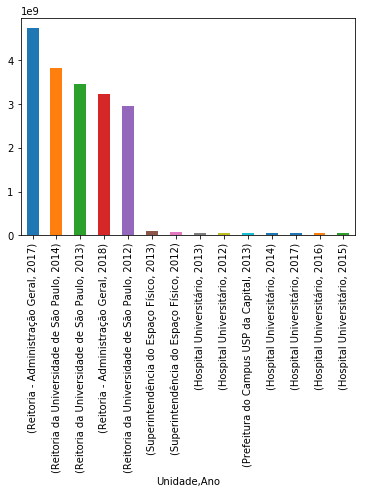

In [15]:
gastos_unidade[2:16].plot(kind='bar')

In [16]:
df_new = df.loc[df['Unidade'].isin(["Faculdade de Medicina de Ribeirão Preto", "Escola Politécnica", "Faculdade de Medicina", "Faculdade de Filosofia, Letras e Ciências Humanas", "Escola Superior de Agricultura Luiz de Queiroz", "Escola de Engenharia de São Carlos", "Escola de Artes, Ciências e Humanidades", "Faculdade de Medicina Veterinária e Zootecnia", "Instituto de Física", "Escola de Comunicações e Artes", "Instituto de Ciências Biomédicas"])]
df_new

,Codigo,Unidade,Grupo_Orçamentário,Fonte_de_Recurso,Subfunção,Programa,Ação,Elemento,Dotação_Inicial_Reais,Dotação_Atual_Reais,Empenhado_Reais,Liquidado_Reais,Pago_Reais,Pago_Restos_Reais,Ano,Tipo
10032,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Diárias Pessoal Civil,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
10033,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Auxílio Financeiro a Estudantes,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
10034,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Auxílio Financeiro a Pesquisadores,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
10035,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Álcool,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
10036,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Gasolina,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
10037,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Óleo Diesel,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
10038,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Gêneros Alimentícios,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
10039,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Outros Materiais de Consumo,"0,00","0,00","0,00",0.00,"0,00","1175,46",2012,Educação
10040,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Peças de Reposição e Acessórios,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
10041,10,Faculdade de Medicina Veterinária e Zootecnia,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,"Peças,Acessórios e Componentes de Informática","0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação


In [17]:
df_new = df_new.groupby(['Unidade', 'Elemento', 'Ano'])["Liquidado_Reais"].agg("sum").sort_index(ascending=False)

In [18]:
df_new = pd.DataFrame(data=df_new)
#df_new.sort_values(ascending=False)
df_new

Liquidado_Reais
Unidade                                        Elemento                                      Ano                  
Instituto de Física                            Suprimentos de Informática                    2013             0.00
                                                                                             2012         78279.20
                                               Serviços, Programas e Aplicativos de Informát 2012         21474.43
                                               Serviços de Vigilância                        2013             0.00
                                                                                             2012       1230020.46
                                               Serviços de Limpeza                           2013             0.00
                                                                                             2012       1294348.43
                                               Serviços de Consultoria                       2018             0.00
                                                                                             2017             0.00
                                                                                             2016             0.00
                                                                                             2015             0.00
                                                                                             2014             0.00
                                                                                             2013             0.00
                                               Serviços Limpeza, Vigilância e Outros - PJ    2018       1260778.06
                                                                                             2017       1630117.84
                                                                                             2016       2007252.76
                                                                                             2015       2301843.70
                                                                                             2014       2371770.57
                                                                                             2013       3226044.57
                                               Serviços Gráficos                             2013             0.00
                                                                                             2012         12930.00
                                               Serviços Diversos de Conservação e Manutenção 2012             0.00
                                               Serv. de Consultoria, Assessoria e Auditoria  2012             0.00
                                               Reformas de Bens Imóveis                      2013             0.00
                                                                                             2012         13500.00
                                               Peças,Acessórios e Componentes de Informática 2013             0.00
                                                                                             2012         25389.42
                                               Peças de Reposição e Acessórios               2013             0.00
                                                                                             2012        257053.46
                                               Passagens e despesas com Locomoção            2018         31767.09
                                                                                             2017        123609.39
                                                                                             2016         89898.28
                                                                                             2015         87423.09
                                                                          

In [19]:
df_new = df_new.reset_index()

In [20]:
df_new = df_new[df_new.Liquidado_Reais > 0]
df_new

,Unidade,Elemento,Ano,Liquidado_Reais
1,Instituto de Física,Suprimentos de Informática,2012,78279.20
2,Instituto de Física,"Serviços, Programas e Aplicativos de Informát",2012,21474.43
4,Instituto de Física,Serviços de Vigilância,2012,1230020.46
6,Instituto de Física,Serviços de Limpeza,2012,1294348.43
13,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2018,1260778.06
14,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2017,1630117.84
15,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2016,2007252.76
16,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2015,2301843.70
17,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2014,2371770.57
18,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2013,3226044.57


In [21]:
df_new.sort_values(by=["Unidade", "Liquidado_Reais"], ascending=False)

,Unidade,Elemento,Ano,Liquidado_Reais
18,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2013,3226044.57
120,Instituto de Física,Equipamentos e Material Permanente,2013,3182240.78
17,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2014,2371770.57
55,Instituto de Física,Outros Serviços de Terceiros - PJ,2013,2318401.32
16,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2015,2301843.70
119,Instituto de Física,Equipamentos e Material Permanente,2014,2061377.77
15,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2016,2007252.76
54,Instituto de Física,Outros Serviços de Terceiros - PJ,2014,1908351.58
14,Instituto de Física,"Serviços Limpeza, Vigilância e Outros - PJ",2017,1630117.84
63,Instituto de Física,Outros Equipamentos e Material Permanente,2012,1354448.77


In [22]:
df_new.Elemento.unique()

array(['Suprimentos de Informática',
       'Serviços, Programas e Aplicativos de Informát',
       'Serviços de Vigilância', 'Serviços de Limpeza',
       'Serviços Limpeza, Vigilância e Outros - PJ', 'Serviços Gráficos',
       'Reformas de Bens Imóveis',
       'Peças,Acessórios e Componentes de Informática',
       'Peças de Reposição e Acessórios',
       'Passagens e despesas com Locomoção', 'Passagens Aéreas',
       'Outros Serviços e Encargos- Pessoa Jurídica',
       'Outros Serviços de Terceiros - Pessoa Física',
       'Outros Serviços de Terceiros - PJ', 'Outros Serviços',
       'Outros Materiais de Consumo',
       'Outros Equipamentos e Material Permanente',
       'Outros Combustíveis e Lubrificantes',
       'Outras Remunerações de Serviços Pessoais', 'Obras e instalações',
       'Máquinas e Motores', 'Monitores', 'Mobiliário em Geral',
       'Material de Consumo', 'Material de Construção',
       'Material Médico-Odontol.,Labor. e Veterin',
       'Material Educati

In [23]:
df_new["categoria"] = np.nan

In [24]:
aggregations = {
    'Elemento':lambda x: ", ".join(map(str,x)),
    'Liquidado_Reais': 'sum'
}

In [25]:
mask_total = df_new.groupby(['Unidade', 'Ano']).agg(aggregations)
mask_total = mask_total.reset_index()
mask_total['categoria'] = 0

In [26]:
mask_total.Elemento = 'Total'
mask_total

,Unidade,Ano,Elemento,Liquidado_Reais,categoria
0,Escola Politécnica,2012,Total,17325866.02,0
1,Escola Politécnica,2013,Total,24029436.54,0
2,Escola Politécnica,2014,Total,17938855.49,0
3,Escola Politécnica,2015,Total,13291293.79,0
4,Escola Politécnica,2016,Total,14955683.65,0
5,Escola Politécnica,2017,Total,14519441.40,0
6,Escola Politécnica,2018,Total,11264693.23,0
7,Escola Superior de Agricultura Luiz de Queiroz,2012,Total,15025624.06,0
8,Escola Superior de Agricultura Luiz de Queiroz,2013,Total,15745947.11,0
9,Escola Superior de Agricultura Luiz de Queiroz,2014,Total,8812991.56,0


In [27]:
#mask_total = df_new.groupby(['Unidade'])["Liquidado_Reais"].agg("sum").sort_index(ascending=False)


mask_1 = df_new.loc[df_new.Elemento.isin(['Execução de Obras e Instalações', 'Estudos e Projetos',
        'Reformas de Bens Imóveis',
        'Obras e instalações',
        'Instal.e Manut.de Equipamentos de Informática',
        'Conservação e Manut. de Bens Móveis e Imóveis'])]
mask_1['categoria'] = 1

mask_2 = df_new.loc[df_new.Elemento.isin(['Serviços Limpeza, Vigilância e Outros - PJ',
        'Estagiários',
        'Vigilância',
        'Locação de Equipamentos Diversos',
        'Loc. de Máq. Reprográficas C/ Mão-de-Obra',
        'Serviços de Consultoria', 'Seguros',
        'Serviços de Utilidade Pública',
        'Serv. de Consultoria, Assessoria e Auditoria',
        'Outras Remunerações de Serviços Pessoais',
        'Locaçãoo de Veículos, Aeronaves e Outros',
        'Outros Serviços Terceiros - Pessoa Física',
        'Serviços, Programas e Aplicativos de Informát',
        'Serviços de Vigilância', 'Serviços de Limpeza',
        'Serviços Gráficos',
        'Outros Serviços e Encargos- Pessoa Jurídica',
        'Outros Serviços de Terceiros - Pessoa Física',
        'Outros Serviços de Terceiros - PJ', 'Outros Serviços',
        'Dedetização, Desinsetização e Desratização',
        'Correios e Telégrafos',
        'Gêneros Alimentícios',
        'Gerenciamento de Abastecimento de Combustívei',
        'Fornec. Alimentação Preparada - Outros',
        'Serviço de Lavanderia',
        'Pessoal Civil - Pago pela Unidade',
        'Fretes e Carretos'])]
mask_2['categoria'] = 2

mask_3 = df_new.loc[df_new.Elemento.isin(['Encargos Sociais e Obrig.Fiscais Audit/Cons.',
        'Diárias no Exterior', 'Diárias Pessoal Civil', 'Diárias - Civil',
        'Passagens e despesas com Locomoção', 'Passagens Aéreas',
        'Auxílio Financeiro a Pesquisadores',
        'Auxílio Financeiro a Estudantes',
        'Assistência Médico-Hospitalar e Odontológica',
        'Ajuda de Custo a Colaborad. Eventuais',
        'Outros Auxíios Financeiros a Pessoas Físicas',
        'Outras Despesas com Transportes e Locomoção',
        'Aluguéis de Imóveis- Pessoa Jurídica',
        'Outras Premiações',
        'Diárias no  Exterior',
        'Premiações Cult, Art, Cient, Desport e Outras'])]
mask_3['categoria'] = 3

mask_4 = df_new.loc[df_new.Elemento.isin(['Peças,Acessórios e Componentes de Informática',
        'Peças de Reposição e Acessórios',
        'Gasolina',
        'Álcool', 'Veículos Diversos',
        'Jornais, Revistas e Periódicos',
        'Ferramentas Avul.Não Acionadas p/Força Motriz',
        'Material Educativo Cultural e Recreativo',
        'Máquinas e Motores', 'Monitores', 'Mobiliário em Geral',
        'Material de Consumo', 'Material de Construção',
        'Material Médico-Odontol.,Labor. e Veterin',
        'Material Educativo, Esportivo e Cultural',
        'Mat.de Escritório,Papéis em Geral e Impressos',
        'Outros Combustíveis e Lubrificantes',
        'Outros Materiais de Consumo',
        'Equipamentos para Informática',
        'Equipamentos e Material Permanente',
        'Equipam.e Mobiliário Médico-Hospitalar, Odont',
        'Outros Equipamentos e Material Permanente',
        'Óleo Diesel', 'Diversos Materiais de Distribuição Gratuita',
        'Medicamentos e Insumos Farmacêuticos',
        'Energia Elétrica',
        'Água e Esgotos',
        'Suprimentos de Informática'])]
mask_4['categoria'] = 4

mask_5 = df_new.loc[df_new.Elemento.isin(['Animais para Abate, Experimento e Sêmen',
        'Encargos Sociais e Obrig.Fiscais - P. Física',
        'Indenizações e Restituições Diversas',
        'Regime de Quilometragem',
        'Mat, Bem ou Serviço para Distr Gratuita',
        'Outras Obrigações Tributárias e Contributivas',
        'Indenizações e Restituições',
        'Despesas de Exercícios Anteriores',
        'Despesas com Tecnologia da Informação',
        'Despesas Miúdas e de Pronto Pagamento',
        'Exames Laboratoriais',
        'Outras Despesas de Exercícios Anteriores',
        'Vencimentos e Vantagens Fixas - Pessoal Civil',
        'Obrigações Tributárias e Contributivas'])]
mask_5['categoria'] = 5

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [28]:
frames = [mask_total, mask_1, mask_2, mask_3, mask_4, mask_5]
df_new = pd.concat(frames, sort=False)
df_new

,Unidade,Ano,Elemento,Liquidado_Reais,categoria
0,Escola Politécnica,2012,Total,17325866.02,0
1,Escola Politécnica,2013,Total,24029436.54,0
2,Escola Politécnica,2014,Total,17938855.49,0
3,Escola Politécnica,2015,Total,13291293.79,0
4,Escola Politécnica,2016,Total,14955683.65,0
5,Escola Politécnica,2017,Total,14519441.40,0
6,Escola Politécnica,2018,Total,11264693.23,0
7,Escola Superior de Agricultura Luiz de Queiroz,2012,Total,15025624.06,0
8,Escola Superior de Agricultura Luiz de Queiroz,2013,Total,15745947.11,0
9,Escola Superior de Agricultura Luiz de Queiroz,2014,Total,8812991.56,0


In [29]:
df_new = df_new.groupby(['Unidade','Ano', 'categoria'])["Liquidado_Reais"].agg("sum").sort_index(ascending=False)

In [30]:
df_new = pd.DataFrame(data=df_new)

In [31]:
df_new.head(n=100)

Liquidado_Reais
Unidade                                 Ano  categoria                 
Instituto de Física                     2018 5                308505.25
                                             4               1173255.22
                                             3                128322.25
                                             2               2301516.98
                                             0               3911599.70
                                        2017 5                  5678.45
                                             4               1346956.08
                                             3                241353.44
                                             2               3201527.89
                                             0               4795515.86
                                        2016 5                  2826.25
                                             4                541539.50
                                             3                279987.53
                                             2               3512304.55
                                             1                158928.00
                                             0               4495585.83
                                        2015 5                   845.88
                                             4                811575.26
                                             3                332995.54
                                             2               3899703.09
                                             1                  3635.00
                                             0               5048754.77
                                        2014 4               3009153.08
                                             3                796785.64
                                             2               4807867.29
                                             1                464994.80
                                             0               9078800.81
                                        2013 4               4199125.03
                                             3                943941.44
                                             2               6354136.95
                                             1                247551.35
                                             0              11744754.77
                                        2012 5                744285.50
                                             4               3674899.48
                                             3                657837.78
                                             2               3091938.19
                                             1               2073100.80
                                             0              10253961.75
Instituto de Ciências Biomédicas        2018 5                122879.71
                                             4                952480.02
                                             3                237672.03
                                             2               2877650.93
                                             0               4190682.69
                                        2017 5                 24832.58
                                             4               1637474.13
                                             3                430515.51
                                             2               3680657.24
                                             0               5773479.46
                                        2016 5                  2471.68
                                             4               1658290.25
                                             3                305064.81
                                             2               3599613.43
                                             0               5565440.17
                                        2015 5                 14034.33
                        

In [32]:
aggregations = {
    'Liquidado_Reais':lambda x: ", ".join(map(str,round(x, 2))),
    'categoria': 'sum'
}
df_new = df_new.reset_index()

In [33]:
df_new = df_new.groupby(['Unidade', 'Ano']).agg(aggregations)
df_new = df_new.reset_index()
df_new['categoria'] = 0
df_new

,Unidade,Ano,Liquidado_Reais,categoria
0,Escola Politécnica,2012,"513035.09, 5396749.62, 1589589.59, 7248560.87,...",0
1,Escola Politécnica,2013,"362235.13, 6733747.94, 1708435.84, 15225017.63...",0
2,Escola Politécnica,2014,"222167.7, 4726675.07, 980148.09, 11948234.63, ...",0
3,Escola Politécnica,2015,"3745.84, 3634922.99, 945472.6, 8707152.36, 132...",0
4,Escola Politécnica,2016,"16078.52, 1986900.83, 931333.31, 11972378.59, ...",0
5,Escola Politécnica,2017,"91520.17, 1889551.23, 1121227.29, 11400819.19,...",0
6,Escola Politécnica,2018,"280878.41, 731773.76, 1123916.09, 9060851.47, ...",0
7,Escola Superior de Agricultura Luiz de Queiroz,2012,"163956.46, 4911836.31, 951173.23, 4909191.93, ...",0
8,Escola Superior de Agricultura Luiz de Queiroz,2013,"80418.34, 6450532.43, 1467572.5, 7389822.4, 35...",0
9,Escola Superior de Agricultura Luiz de Queiroz,2014,"179582.93, 3373984.79, 1022651.74, 4114329.99,...",0


In [34]:
for i in df_new.index:
    print(df_new.iloc[i,0],": ", "orcamentoAnual(", df_new.iloc[i,2], ")")

Escola Politécnica :  orcamentoAnual( 513035.09, 5396749.62, 1589589.59, 7248560.87, 2518784.85, 17325866.02 )
Escola Politécnica :  orcamentoAnual( 362235.13, 6733747.94, 1708435.84, 15225017.63, 24029436.54 )
Escola Politécnica :  orcamentoAnual( 222167.7, 4726675.07, 980148.09, 11948234.63, 61630.0, 17938855.49 )
Escola Politécnica :  orcamentoAnual( 3745.84, 3634922.99, 945472.6, 8707152.36, 13291293.79 )
Escola Politécnica :  orcamentoAnual( 16078.52, 1986900.83, 931333.31, 11972378.59, 14955683.65 )
Escola Politécnica :  orcamentoAnual( 91520.17, 1889551.23, 1121227.29, 11400819.19, 7900.0, 14519441.4 )
Escola Politécnica :  orcamentoAnual( 280878.41, 731773.76, 1123916.09, 9060851.47, 11264693.23 )
Escola Superior de Agricultura Luiz de Queiroz :  orcamentoAnual( 163956.46, 4911836.31, 951173.23, 4909191.93, 4068070.8, 15025624.06 )
Escola Superior de Agricultura Luiz de Queiroz :  orcamentoAnual( 80418.34, 6450532.43, 1467572.5, 7389822.4, 357601.44, 15745947.11 )
Escola Superi